In [1]:
#XGBoost in Python from Start to Finish(Customer_Churn)

#In this we will use XGBoost to build a collection of boosted trees and use continuous and categorical data
# from IBM Base Samples to predict whether or not a customer will stop using a company's service.In business
#lingo,this is called Customer Churn.

#XGBoost is an exceptionally useful machine learning method when you don't want to sacrifice the ability to
#correctly classify observations but you still want a model that is fairly easy to understand and interpret

#1.Importing the data from the file

#2.Missing Data
#1.Identifying Missing Data
#2.Dealing with Missing Data

#3.Formatting the Data for XGBoost
#1.Splitting data into indepenedent and dependent variables
#2.One-Hot-Encoding
#3.Converting all columns to int,float or bool

#4.Building a preliminary XGBoost Model

#5.Optimizing Parameters with Cross Validation and GridSearchCV()
#1.Optimizing the Learning rate,Tree depth,Number of trees,Gamma(for pruning) & Lamada(for regularization)

#6.Building,Drawing,Interpreting and Evaluating the Optimized XGBoost Model

#1.Import the required modules

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Import the dataset IBM_Base_Samples Telco_Customer_Churn from E:/datafiles/Telco_customer_churn.csv

df = pd.read_csv('E:/datafiles/Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
#The last four variables contains exit interview information and should not be used for prediction,so we
#will remove them
#set axis=0 to remove rows, set axis=1 to remove columns

df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [4]:
#Some of the other columns only contain a single value,and will not be useful for classification for eg:-

df['Count'].unique()

array([1], dtype=int64)

In [5]:
df['Country'].unique()

array(['United States'], dtype=object)

In [6]:
df['State'].unique()

array(['California'], dtype=object)

In [7]:
#We can omit those variables,In contrast,City contains a bunch of different city names,so we will leave it

df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [8]:
#We will also remove "Customer ID" because it is different for every customer and nouse for classification
#Lastly we will drop Lat Long because there are separate columns for Latitude and Longitude.

df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis = 1, inplace = True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [9]:
#Although it is ok to have whitespaces in the city names in City for XGBoost and classification,we can't
#have any whitespaces if we want to draw a tree.So let's take care of that now by replacing whitespaces in
#the City names with an "_(underscore_character)"

#We can easily remove whitespaces from all values,not just City names,but we will wait to do that untill
#after we have identified missing values.

df['City'].replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [10]:
#To get the first 10 unique City names

df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [11]:
#We will also need to eliminate whitespaces in the column names,so we will replace it with underscore"_"

df.columns = df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [12]:
#Now we have removed all the data that will not help use create an effective XGBoost model and reformatted
#column names and City names,so that we can draw a tree.Now we are ready to identify&deal with Missing Data

#Missing Data Part:1:- Identifying Missing Data

#Missing Data is simply a blank space, or surrogate value like NA, that indicates that we failed to collect
#data for one of this feature.For example,if we forgot to ask someone's age, or forgot to write it down,
#then we would have a blank space in the dataset for that person's age.

#Onething that is relatively unique about XGBoost is that it has default behaviour for missing data.So all
#we have to do is identify missing values and make sure they are set to 0.

#First see what sort of data in each column.

df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [13]:
#A lot of the columns are object, and this is OK,because,as we saw above when we ran head() there were a
#lot of text responses,like 'Yes' and 'No'.However,lets verify that we are getting what we expect.

df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
#So,Phone_Service has type object because it contains text, and it only contains two values i.e 'Yes'&'No'
#So this is good.Now,in practice,we would check every other columns,and we did this,but right now we will
#focus on one specific column that looks like it could be a problem:Total_Charges.

#If we look at the output from head(),Total_Charges looks like it contains numbers,not text,but the object
#datatypes suggests that it contains more than just numbers.If we try trick of printing out unique values.

df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [15]:
#We see that there are two many values to print and what little we see looks like numbers,However,if we try
#to convert the column to numeric values.

#We get an ValueError: Unable to parse string " " at position 2234, This error tells us that the problem is
#due to blank spaces,' ',in the data.So we need to deal with those.

#df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [16]:
#Missing Data Part:2:- Dealing with Missing Data, XGBoost Style

#Onething that is relatively unique about XGBoost is that it has default behaviour for missing data.So all
#we have to do is identify missing values and make sure they are set to 0.

#Before that we will see how many rows are having missing data.If it's lot,then we might have a problem on
#our hands that is bigger than what XGBoost can deal with on its own.If its not thatmany we can set to '0'.

len(df.loc[df['Total_Charges'] == ' '])

11

In [17]:
#Since only 11 rows have missing values,let's look at them.

df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [18]:
#We see that all 11 people with Total_Charges == ' ' have just signed up,because Tenure_Months is 0.These
#people also have Churn_Value set to '0' because they just signed up.So we have a few choices here,we can 
#set Total_Charges to '0' for these 11 people or we can remove them by setting Total_Charges to '0'.

df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [19]:
#Now let's verify that we modified Total_Charges correctly by looking at everyone who had Tenure Months
#set to '0'

df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [20]:
#We have verified that df contains '0's instead of ' ' white_spaces for missing values.
#Total_charges still has the object datatype.That is no good because XGBoost only allows int,float& boolean
#datatypes.We can fix this by converting it to_numeric()

df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [21]:
#Now we have dealt with the missing data,we can replace all of the other whitespaces in all of the columns
#with underscore'_'.We are only doing this we can draw a picture of the one of the XGBoost trees.

df.replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [22]:
#Format Data Part:1:- Split the Data into Dependent and Independent Variables.

#Now we have deal with Missing Data,we are ready to start formatting the data for making an XGBoost model

#The first step is to split the data into two parts.

#1.The columns of data that we will use to make classifications(X-Captial_case_notation)
#2.The column of data that we want to predict(y-Small_case_notation)

#Note:- In this case,we want to predict Churn_Value(Whetherbor not someone will leave the company)

#The reason we will deal with Missing Data before splitting it into "X" and "y" is that if we remove rows,
#splitting after ensures that each row in "X" correctly corresponds with the appropriate value in "y"

#Note:- In the code below we are using copy() to copy the data by value.By default,pandas uses copy by
#refrence.Using copy() ensures that the original data df_no_missing is not modified when we modify "X"
#or "y".In other words,if we make a mistake when we are formatting the columns for classification trees,
#we canjust re-copy df_no_missing

X = df.drop('Churn_Value', axis = 1).copy() #alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [23]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [24]:
#Now we have created "X"---> which we want to use to make predictions"y"---> which has the data we want to
#predict,we are ready to continue formatting "X" so that it is suitable for making a model with XGBoost

#Format the Data Part:2:- One_Hot_Encoding

#Now we have created "X"---> which contains the data,we will use to make, or predictions,classifications
#and "y"---> which contains the known classifications in our training dataset,we will use to predict.

#We need to take a closer look at the variables in "X".The list below tells us what each variable
#represents and the type of data(float or categorical) it should contain:

#1.City-Category
#Los Angeles, Beverly Hills, etc...

#2.Zip Code-Category
#9003,90005,etc...

#3.Latitude-Float

#4.Longitude-Float

#5.Gender-Category
#Male,Female

#6.Senior Citizens-Category
#Yes,No

#7.Partner-Category
#Yes,No

#8.Dependents-Category
#Yes,No

#9.Tenure Months-Float

#10.Phone Service-Category
#Yes,No

#11.Multiple Lines-Category
#yes,No

#12.Internet Service-Category
#No,DSL,Fiber optic

#13.Online Security-Category
#Yes,No

#14.Online Backup-Category
#Yes,No

#15.Device Protection-Category
#Yes,No

#16.Tech Support-Category
#Yes,No

#17.Streaming TV-Category
#Yes,No

#18.Streaming Movies-Category
#Yes,No

#19.Contract-Category
#Month-to-month,one-year,Two-year

#20.Paperless Billing-Category
#Yes,No

#21.Payment Method-Category
#Mailed check,Electronic check,etc

#22.Monthly Charges-Float

#23.Total Charges-Float

#Now,just to review,let's look at the data types in "X" to remember how Python is seeing the data right now.

X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [25]:
#So we see that Latitude,Longitude,Monthly_Charges and Total_Charges are all float64, which is good,because
#we want to be floating point numbers.All of the columns that are Object_type,However, need to be inspected
#to make sure they only contain reasonable values,and most,if not all of them,will need to change.This is
#because,while XGBoost natively supports continuous data,like Monthly_Charges and Total_Charges,it doesnot
#natively support categorical data,like Phone_Service,which contains 2 different categories.Thus,in order 
#to use categorical data with XGBoost,we have to use a trick that convert a column of categorical data into
#multiple columns of binary values.This trick is called One_Hot_Encoding.

#At this point we may be wondering,'Whats wrong with treating categorical data like continuous data?'To
#answer that question,let's look at an example:For the Payment_Method column,we have a bunch of options:

#1.Mailed_Check
#2.Electronic_Check
#3.Bank_Transfer
#4.Credit_Card

#If we converted these categories into numbers,1,2,3and 4,treated them like continuous data,then we would
#assume that 4,which means Credit_Card,is more similar to 3,which means Bank_Transfer,than it is 1 or 2,
#which are other forms of payment.That means the XGBoost Tree would be more likely to cluster the people
#with 4s and 3s together than the people with 4s and 1s together.In constrast,if we treat these Payment_
#Methods like categorical data,then we treat each one as a separate category that is no more or less 
#similar to any of the other categories.Thus,the likelihood of clustering people who pay with a Mailed_
#Check with people who pay with Electronic_Check is the same as clustering Mailed_Check with Credit_Card,
#and that approach is more reasonable.

#Note:- There are many different ways to do One_Hot_Encoding in Python.Two of the more popular methods are
#ColumnTransformer() (from sckit-learn) and get_dummies() (from pandas),and both methods have pros and cons
#ColumnTransformer() has a very cool feature where it creates a persistent function that can validate data
#that you get in the future.For example,if you build your XGBoost model using a categorical variable
#favorite color that has red,blue and green options,then ColumnTransformer() can remember those options
#and later on when our XGBoost model is being used in a production system,if someone says their favorite 
#color is orange(),then ColumnTransformer() can throw an error or handle the situation in some other nice
#way.The downside of the ColumnTransformer() is that it turns your data into an array and loses all of the
#column names,making it harder to verify that our usage of ColumnTransformer() worked as you intended it to
#In contrast,get_dummies() leaves your data in a dataframe and retains the column names,making it much 
#easier to verify that it worked as intended.However,it does not have the persistent behaviour that
#ColumnTransformer has.So,for the sake of learning how One_Hot_Encoding works,we prefer 2 use get_dummies()
#However,once you are comfortable with One_Hot_Encoding.We encourage you to investigate on using the
#ColumnTransformer().

#First,before we commit to converting columns with One_Hot_Encoding,let's just see what happens when we
#convert Payment_Method without saving the results.This will make it easy to see how get_dummies() works.

pd.get_dummies(X, columns = ['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [26]:
#As we can see in the output above,get_dummies() puts all of the columns it does not process,in the front
#and it puts the values for Payment_Method at the end,split into 4 columns,just like we expected it.
#Payment_Method_Bank_transfer is 1 for any person that paid by Bank_transfer and 0 for everyone else.and
#also Payment_Method_Credit_transfer is 1 for anyone that paid with Credit_card and 0 for everyone else.

#Now that we see how get_dummies() works, lets use it on all the categorical columns ans save the result.

#Note:-In a real situation(not a tutorial like this),you should verify all of thse columns to make sure 
#they only contain the accepted categories,however,for this we have already done that.

#One_Hot_Encoding works well with trees but not suitable for linear regression and logistic regressions.

X_encoded = pd.get_dummies(X, columns = ['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [27]:
#Now,before we build an XGBoost model,lets verify 'y' contains 1's and 0's with unique()

y.unique()

array([1, 0], dtype=int64)

In [28]:
#Now we have finished formatting the data for making an XGBoost model, so let's do it

#Build A preliminary XGBoost Model

#Now we will split the data into training and testing sets to build the model.However first,observe the 
#data is imbalanced by dividing the number of people who let the company,where y = 1,by total number of
#people in the dataset.

sum(y)/len(y)

0.2653698707936959

In [29]:
#So we see that only 27% of the people in dataset left the company.Because of this,when we split the data
#into training and testing,we will split using stratification in order to maintainn the same percentage of
#people who left the company in both the training set and the testing set.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [30]:
#Now let's verify that using stratify(for maintaing same percentage) worked as expected

sum(y_train)/len(y_train)

0.2654297614539947

In [31]:
sum(y_test)/len(y_test)

0.26519023282226006

In [32]:
#Stratify worked as expected and both y_train and y_test have the same percentage of people that left the
#company.Now lets build preliminary model.

#Note:- Instead of determinig the optimal number of trees with cross validation,we will use early stopping
#to stop building trees when they no longer improve the situation.

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed = 42)
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65311
[4]	validation_0-aucpr:0.65514
[5]	validation_0-aucpr:0.65397
[6]	validation_0-aucpr:0.64818
[7]	validation_0-aucpr:0.64908
[8]	validation_0-aucpr:0.65365
[9]	validation_0-aucpr:0.65074
[10]	validation_0-aucpr:0.65011
[11]	validation_0-aucpr:0.65012
[12]	validation_0-aucpr:0.65120
[13]	validation_0-aucpr:0.65151
[14]	validation_0-aucpr:0.65163


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

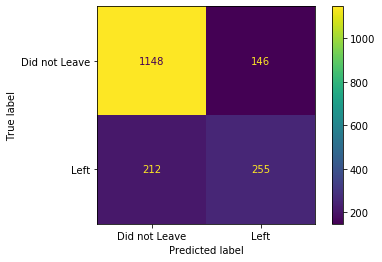

In [33]:
#We built an XGBoost model for classification.Lets see how it performs on the Testing Dataset by running
#the Testing Dataset down the model and drawing a Confusion Matrix.

plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not Leave', 'Left'])

In [34]:
#In the confusion matrix,we see that of the 1294 people that did not leave, 1148(89%) were correctly
#classified.And of the 467 people that left the company, 255(55%) were correctly classified.So the
#XGBoost model was not awesome.Part of the problem is that our data is imbalanced,which we saw earlier
#and we see this in the confusion matrix with the top row showing 1262 people that did not default and 
#the bottom row showing 467 people who did.Because people leaving costs the company a lot of money,we
#would like to capture more of the people left.The good news is that in XGBoost we have a parameter,
#scale_pos_weight,that helps with imbalanced data.So lets try to improve the predictions by using the
#Cross_validation to optimize the parameters.

#Optimize Parameters using the Cross Validation and GridSearchCV()

#XGBoost has a lot of hyperparameters,parameters that we have to manual configure and are not determined
#by XGBoost itself,including max_depth,the maximum tree depth,learning_rate,the learning rate,or 'eta',
#'gamma',the parameter that encourages pruning,and reg_lambda,the regularization parameter lambda.So lets
#try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with 
#the Testing Dataset.

#Note:- Since we have many hyperparameters to optimize,we will use GridSearchCV().We specify a bunch of 
#potential values for the hyperparameters and GridSearchCV() tests all possible combinations of the
#parameters for us.

#Note:- When data are imbalanced, the XGBoost manual says...

#If we care only about the overall performance metric(AUC) of our prediction
#1.Balance the positive and negative weights via scale_pos_weight
#2.Use AUC for evaluation
#Also note:- We ran GridSearchCV sequentially on subsets of parameter options, rather than all at in order
#to optimize parameters in a short period of time.

#Round1:-

#output: max_depth:4, learning_rate:0.1, gamma:0.25, reg_lambda:10, scale_pos_weight=:3
#Because learning_rate,reg_lambda were at the ends of their range,we will continue to explore

#param_grid = {
    #'max_depth': [3,4,5],
    #'learning_rate': [0.1, 0.01, 0.05],
    #'gamma': [0, 0.25, 1.0],
    #'reg_lambda': [0, 1.0, 10.0],
    #'scale_pos_weight': [1,3,5] #Note: XGBoost recommends sum(negative instances) / sum(positive instances)
#}

In [35]:
#optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(
#objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                                 #param_grid=param_grid,
                                 #scoring='roc_auc',
                                 #verbose=2,
                                 #n_jobs=10,
                                 #cv=3)

In [36]:
#optimal_params.fit(X_train,
           #y_train,
           #early_stopping_rounds = 10,
           #eval_metric = 'auc',
           #eval_set = [(X_test, y_test)],verbose=False)
#print(optimal_params.best_params_)

In [37]:
#Round:2:-

#output: max_depth:4, learning_rate:0.1,reg_lambda:10

param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10, 20, 100],
    'scale_pos_weight': [3]
}

In [38]:
#Note: To speed up cross validation, and to further prevent overfitting.
#We are only using a random subset of the data (90%) and are only using a random subset of the features
#(columns)(50%) per tree.

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(
objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                                 param_grid=param_grid,
                                 scoring='roc_auc',
                                 verbose=2,
                                 n_jobs=1,
                                 cv=3)

In [39]:
optimal_params.fit(X_train,
                   y_train,
                   verbose=False,
                   early_stopping_rounds = 10,
                   eval_metric = 'auc',
                   eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.2s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.7s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.6s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   4.0s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   5.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   4.7s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   5.0s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   6.7s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   6.7s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.7s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.8s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.0s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   1.8s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   2.2s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   1.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   3.1s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   1.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=0.5, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   2.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.5s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.5s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.6s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   1.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   1.3s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=20, scale_pos_weight=3; total time=   1.6s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   2.2s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   2.9s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END gamma=0.25, learning_rate=1, max_depth=4, reg_lambda=100, scale_pos_weight=3; total time=   2.2s


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 3}


In [40]:
#So, after testing all possible combitions of potential parameter values with Cross Validation,we see that
#we should set {'gamma':0.25, 'learning_rate':0.1, 'max_depth':4, 'reg_lambda':10, 'scale_pos_weight':3}

#Building,Evaluating,Drawing,and Interpreting the Optimized XGBost Model

#Now we have the ideal parameter values,we can build the final XGBoost model.

clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5)

clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds = 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.58929
[1]	validation_0-aucpr:0.60110
[2]	validation_0-aucpr:0.62005
[3]	validation_0-aucpr:0.62286
[4]	validation_0-aucpr:0.62528
[5]	validation_0-aucpr:0.62652
[6]	validation_0-aucpr:0.62437
[7]	validation_0-aucpr:0.62503
[8]	validation_0-aucpr:0.63044
[9]	validation_0-aucpr:0.63322
[10]	validation_0-aucpr:0.63886
[11]	validation_0-aucpr:0.64120
[12]	validation_0-aucpr:0.63998
[13]	validation_0-aucpr:0.63862
[14]	validation_0-aucpr:0.64061
[15]	validation_0-aucpr:0.64285
[16]	validation_0-aucpr:0.64154
[17]	validation_0-aucpr:0.64090
[18]	validation_0-aucpr:0.64132
[19]	validation_0-aucpr:0.64233
[20]	validation_0-aucpr:0.64212
[21]	validation_0-aucpr:0.64581
[22]	validation_0-aucpr:0.64852
[23]	validation_0-aucpr:0.64580
[24]	validation_0-aucpr:0.64650
[25]	validation_0-aucpr:0.64760
[26]	validation_0-aucpr:0.64752
[27]	validation_0-aucpr:0.64756
[28]	validation_0-aucpr:0.65006
[29]	validation_0-aucpr:0.65066
[30]	validation_0-aucpr:0.64983
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

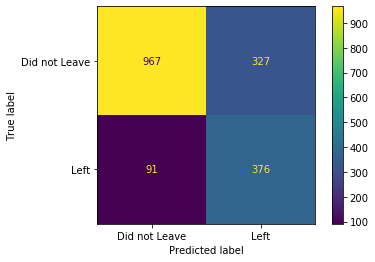

In [41]:
#Now lets draw another confusion matrix to see if the optimized XGBoost model does better.

plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not Leave', 'Left'])

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
weight:  {'Contract_Two_year': 1, 'Contract_One_year': 1, 'Tech_Support_No': 1, 'Tenure_Months': 4, 'Monthly_Charges': 2, 'Latitude': 2}
gain:  {'Contract_Two_year': 358.793091, 'Contract_One_year': 183.241547, 'Tech_Support_No': 71.4932861, 'Tenure_Months': 15.832074624999999, 'Monthly_Charges': 22.513073549999998, 'Latitude': 3.367036583}
cover:  {'Contract_Two_year': 602.0, 'Contract_One_year': 501.25, 'Tech_Support_No': 398.5, 'Tenure_Months': 125.3125, 'Monthly_Charges': 54.375, 'Latitude': 52.0}
total_gain:  {'Contract_Two_year': 358.793091, 'Contract_One_year': 183.241547, 'Tech_Support_No': 71.4932861, 'Tenure_Months': 63.328298499999995, 'Monthly_Charges': 45.0261470999999

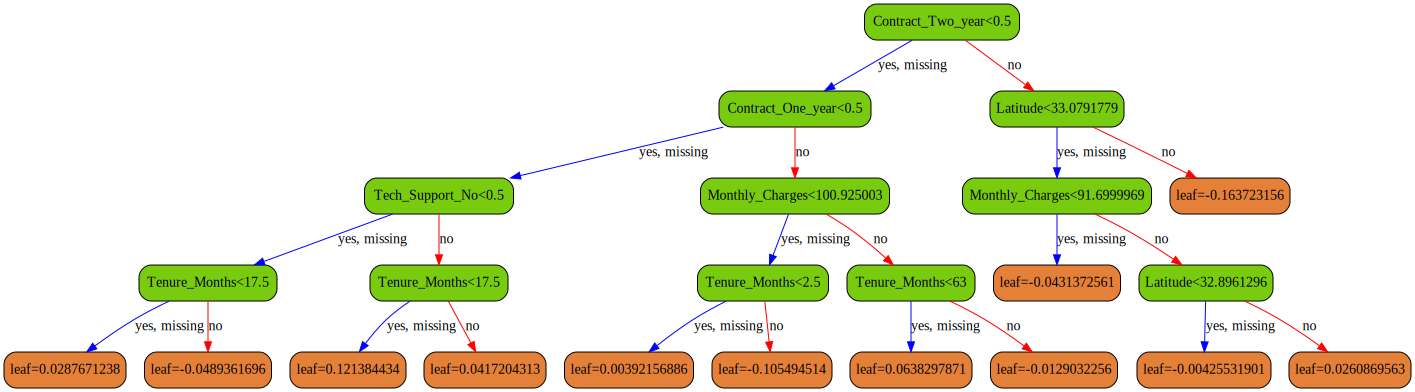

In [42]:
#We see that the optimized XGBoost model is a lot better at identifying people that have left the company.
#out of the 467 people that left the company,376(81%),were correctly identified.Before optimization,we 
#only correctly identified 255(55%).However this improvement was the expense of not being able to correctly
#classify as many people that did not leave.Before optimization,we correctly identified 1148(89%) people
#that did not leave.Now we only correctly classify 967(75%).That said,this trade off may be better for the 
#company because now it can focus resources on the people that leave if that will help them retain them.

#Now we are going to draw the XGBoost Tree and discuss and discuss how to interpret it

#If we want to get information.Like gain and cover etc,at each node in the first tree
#We just build the first tree, otherwise we will get the average over all of the trees.

#Note:- We set n_estimators=1,to get gain,cover etc and build one tree...

import graphviz
import pydotplus
import pyparsing


clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           n_estimators=1) #We set n_estimators=1,to get gain,cover etc

clf_xgb.fit(X_train, y_train)

#Now print out the weight, gain, cover etc... fpr the tree
#weight = number of times a feature is used in a branch or root across all trees
#gain = the average gain across all splits that the feature is used in
#cover = the average coverage across all splits that the feature is used in
#total_gain = the total gain coverage across all splits that the feature is used in
#total_cover = the total coverage across all splits that the feature is used in
#Note:- Since we only built one tree, gain = total_gain and cover = total_cover

bst = clf_xgb.get_booster()
for importance_type in('weight','gain','cover','total_gain','total_cover'):
    print('%s: ' % importance_type,bst.get_score(importance_type=importance_type))
    
node_params = {'shape': 'box', #make the nodes fancy
              'style': 'filled,rounded',
              'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
              'style': 'filled,rounded',
              'fillcolor': '#e48038'}

#Note:- num_trees is NOT the number of trees to plot,but the specific tree you want to plot
#The default value is 0,but We are setting it just to show it in action since it is counter-intuitive.

xgb.to_graphviz(clf_xgb,num_trees=0,size='10,10',
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

#If you want to save the figure...
#graph_data = xgb.to_graphviz(clf_xgb,num_trees=0,size='10,10',
               #condition_node_params=node_params,
               #leaf_node_params=leaf_params)
#graph_data.view(filename='xgboost_tree_customer_churn') #Save as PDF


#Now lets discuss to interpret the XGBoost Tree,in each node we have
#1.The variable (column name) and the threshold for splitting the observations.Foe example,in the trees 
#root,we use Contract_Two_year<0.5 go to the left and all all observations with Contract_Two_year>0.5
#go to the right.

#2.Each branch either says yes or no ansd some also say missing
#(yes&no) refer to whether the threshold in the node above it is true or not.If so,then yes,if not,then no.
#missing is the default option if there is missing data.

#3.leaf tells us the output value for each leaf.